### IMBD Movie review Classification Project

### Import necessary libraries

In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

### Read IMDB Dataset

In [2]:
df=pd.read_csv('IMDB Dataset.csv')[0:1000]
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Check Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     1000 non-null   object
 1   sentiment  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


### View descriptive stats

In [5]:
df.describe()

,review,sentiment
count,1000,1000
unique,1000,2
top,One of the other reviewers has mentioned that ...,positive
freq,1,501


### Check for imbalanced data

<Axes: ylabel='count'>

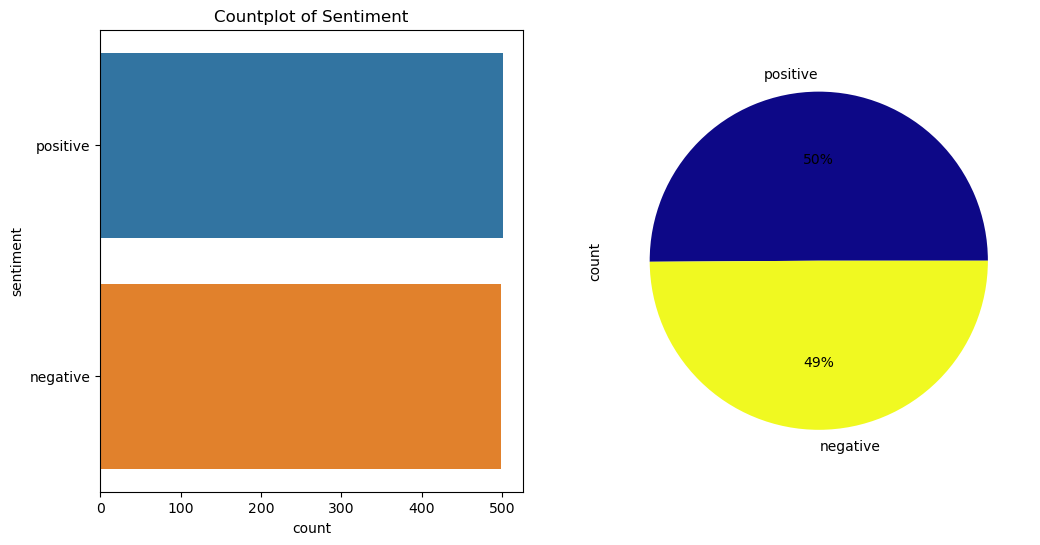

In [6]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(y=df['sentiment'])
plt.title('Countplot of Sentiment')
plt.subplot(1,2,2)
df['sentiment'].value_counts().plot.pie(autopct='%1.i%%',cmap='plasma')

### Create a function to Preprocess the review column

In [7]:
import re
from nltk.stem import WordNetLemmatizer


In [8]:
def preprocess(sentence):
    review=re.sub(r"[^0-9a-zA-Z]",' ',sentence).split()
    
    review=[i.lower() for i in review]
    
    lemma=WordNetLemmatizer()
    review=[lemma.lemmatize(word,'v') for word in review]
    review=' '.join(review)
    return review
    

In [9]:
df['review']=df['review'].apply(preprocess)

### Print some text after applying the function

In [10]:
for i in range(15):
    print(df['review'][i],'---',df['sentiment'][i])
    

one of the other reviewers have mention that after watch just 1 oz episode you ll be hook they be right as this be exactly what happen with me br br the first thing that strike me about oz be its brutality and unflinching scenes of violence which set in right from the word go trust me this be not a show for the faint hearted or timid this show pull no punch with regard to drug sex or violence its be hardcore in the classic use of the word br br it be call oz as that be the nickname give to the oswald maximum security state penitentary it focus mainly on emerald city an experimental section of the prison where all the cells have glass front and face inwards so privacy be not high on the agenda em city be home to many aryans muslims gangstas latinos christians italians irish and more so scuffle death star dodgy deal and shady agreements be never far away br br i would say the main appeal of the show be due to the fact that it go where other show wouldn t dare forget pretty picture paint 

### Split the dataset into Input (X) & Target (y) variable

In [11]:
X=df['review']
y=df['sentiment']

### Convert y variable values into 0 and 1 from positive and negative

In [12]:
from sklearn.preprocessing import LabelBinarizer

In [13]:
encoder=LabelBinarizer()

In [14]:
y=encoder.fit_transform(y)

In [15]:
labels=encoder.classes_
labels

array(['negative', 'positive'], dtype='<U8')

In [16]:
y

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
    

In [17]:
y

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
    

### Create Keras tokenizer object with 5000 max words
* Convert text to sequence
* Add padding

In [18]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [19]:
tokenizer=Tokenizer(num_words=5000)

In [20]:
tokenizer.fit_on_texts(X)

In [21]:
vocab_size=len(tokenizer.word_index)+1

In [22]:
tokenizer

In [23]:
def text_encoding(txt):
    encoded_docs=tokenizer.texts_to_sequences(txt)
    padded_sequences=pad_sequences(encoded_docs,maxlen=128)
    return padded_sequences

In [24]:
X=text_encoding(X)

### Split the dataset into Training & Testing set

In [25]:
from sklearn.model_selection import train_test_split 

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

### Create keras Sequential Model with LSTM Layers

In [27]:
from keras import Sequential,layers

In [28]:
model=Sequential()
model.add(layers.Embedding(vocab_size,128))
model.add(layers.LSTM(128,return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(128))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(1,activation='softmax'))


In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         1901696   
                                                                 
 lstm (LSTM)                 (None, None, 128)         131584    
                                                                 
 dropout (Dropout)           (None, None, 128)         0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

### Compile the model

In [30]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])




### Train the model with our training set

In [31]:
X_train.shape

(800, 128)

In [32]:
y_train.shape

(800, 1)

In [33]:
model.fit(X_train,y_train,epochs=10,validation_split=0.5)

Epoch 1/10
13/13 [==============================] - 12s 488ms/step - loss: 0.6932 - accuracy: 0.4675 - val_loss: 0.6949 - val_accuracy: 0.5100
Epoch 2/10
13/13 [==============================] - 5s 384ms/step - loss: 0.6710 - accuracy: 0.4675 - val_loss: 0.7178 - val_accuracy: 0.5100
Epoch 3/10
13/13 [==============================] - 5s 381ms/step - loss: 0.4767 - accuracy: 0.4675 - val_loss: 0.6529 - val_accuracy: 0.5100
Epoch 4/10
13/13 [==============================] - 5s 391ms/step - loss: 0.2437 - accuracy: 0.4675 - val_loss: 0.8688 - val_accuracy: 0.5100
Epoch 5/10
13/13 [==============================] - 5s 386ms/step - loss: 0.0773 - accuracy: 0.4675 - val_loss: 1.2405 - val_accuracy: 0.5100
Epoch 6/10
13/13 [==============================] - 5s 385ms/step - loss: 0.0152 - accuracy: 0.4675 - val_loss: 1.4449 - val_accuracy: 0.5100
Epoch 7/10
13/13 [==============================] - 5s 388ms/step - loss: 0.0013 - accuracy: 0.4675 - val_loss: 1.5167 - val_accuracy: 0.5100
Epoch

### Make prediction with X_test

In [34]:
y_pred=model.predict(X_test)


7/7 [==============================] - 2s 82ms/step


In [39]:
y_pred

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

### Convert to 0 and 1 with higher probability towards 1

In [40]:
pred=[]
for i in y_pred:
    if i<0.5:
        pred.append(0)
    else:
        pred.append(1)

In [41]:
set(pred)

{1}

### Evaluate the model

In [44]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [45]:
y_pred=[np.argmax(i) for i in pred]

### Check accuracy score

In [46]:
accuracy_score(y_test,y_pred)

0.45

### Check confusion matrix

<Axes: >

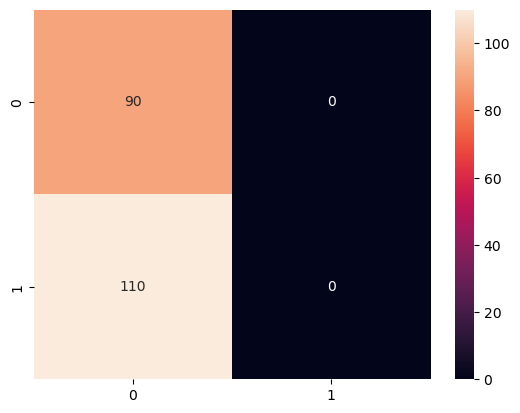

In [47]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

### Print Classification report

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.45      1.00      0.62        90
           1       0.00      0.00      0.00       110

    accuracy                           0.45       200
   macro avg       0.23      0.50      0.31       200
weighted avg       0.20      0.45      0.28       200



C:\Users\aryav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aryav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aryav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***